# PG Diploma in Machine Learning and AI March 2018

## Telecom Churn - ML Group Case Study

In this notebook we analyse two things

Whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

To identify important variables that are strong predictors of churn. These variables may also indicate why 
customers choose to switch to other networks.

Solutions is divided into below parts :

- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


Team 

- Akansha Jawanpuria (akansha.jawanpuria@gmail.com)
- Ravi Kumar N K (ravink259@gmail.com)
- Sabyasachi Dey (sabyasachidey1@outlook.com)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter, OrderedDict

%matplotlib inline
color = sns.color_palette()
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')


# 1. Load and Clean the dataset

In [19]:
telecom = pd.read_csv("telecom_churn_data.csv")
print("Total numnber of customers in the data: {}".format(telecom.shape[0]))
print("Total numnber of fields in the data: {}".format(telecom.shape[1]))

Total numnber of customers in the data: 99999
Total numnber of fields in the data: 226


### Understand the structure of our dataframe

In [20]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6     ...      sachet_3g_9  fb_user_6  \
0            9/30/2014  197.385     ...                0        1.0   
1            9/30/2014   34.047     ...                0        NaN   
2            9/30/2014  167.690     ...                0        NaN   
3            9/30/2014  221.338     ...                0        NaN   
4            9/30/2014  261.636     ...                0        0.0   

   fb_user_7  fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0        1.0        1.0        NaN   968        30.4         0.0      101.20   
1        1.0        1.0        NaN  1006         0.0         0.0        0.00   
2        NaN        NaN        1.0  1103         0.0         0.0        4.17   
3        NaN        NaN        NaN  2491         0.0         0.0        0.00   
4        NaN        NaN        NaN  1526         0.0         0.0        0.00   

   sep_vbc_3g  
0        3.58  
1        0.00  
2        0.00  
3        0.00  
4        0.00  

[5 rows x 226 columns]

In [21]:
telecom.describe(include='all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6      ...       \
count                 98899                98340  99999.000000      ...        
unique                    1                    1           NaN      ...        
top               8/31/2014            9/30/2014           NaN      ...        
freq                  98899                98340           NaN      ...        
mean                    NaN                  NaN    282.987358      ...        
std                     NaN                  NaN    328.439770      ...        
min                     NaN                  NaN  -2258.709000      ...        
25%                     NaN                  NaN     93.411500      ...        
50%                     NaN                  NaN    197.704000      ...        
75%                     NaN                  NaN    371.060000      ...        
max                     NaN                  NaN  27731.088000      ...        

         sachet_3g_9     fb_user_6     fb_user_7     fb_user_8     fb_user_9  \
count   99999.000000  25153.000000  25571.000000  26339.000000  25922.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.084581      0.914404      0.908764      0.890808      0.860968   
std         0.650457      0.279772      0.287950      0.311885      0.345987   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.000000      1.000000      1.000000      1.000000      1.000000   
50%         0.000000      1.000000      1.000000      1.000000      1.000000   
75%         0.000000      1.000000      1.000000      1.000000      1.000000   
max        49.000000      1.000000      1.000000      1.000000      1.000000   

                 aon    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g    sep_vbc_3g  
count   99999.000000  99999.000000  99999.000000  99999.000000  99999.000000  
unique           NaN           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN           NaN  
mean     1219.854749     68.170248     66.839062     60.0

### Clean null and constant columns

#### Let's find out if we have any columns with all null values. We shall also remove the constant columns as those are not helpful for our analysis

In [22]:
null_columns = telecom.columns[telecom.apply(lambda x: pd.isnull(x).sum() == len(x))]
constant_columns = telecom.columns[telecom.apply(lambda x: x.nunique() == 1)]
print("Total number of null variables in the data: {}".format(len(null_columns)))
print("Total number of constant variables in the data: {}".format(len(constant_columns)))
print("\nThe null columns are: \n{}\n".format(", ".join(null_columns.tolist())))
print("The constant columns are: \n: {}".format(", ".join(constant_columns.tolist())))

Total number of null variables in the data: 0
Total number of constant variables in the data: 16

The null columns are: 


The constant columns are: 
: circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_t2c_mou_9, std_ic_t2o_mou_6, std_ic_t2o_mou_7, std_ic_t2o_mou_8, std_ic_t2o_mou_9


There are no null columns in the data set , good sign to move ahead !!

There are 16 constant columns in our dataset which can be dropped/removed as they bear no information about the business problem we are dealing with.

In [23]:
#Lets remove these 16 columns from our dataset
telecom.drop(null_columns.tolist() + constant_columns.tolist(), axis = 1, inplace=True)
#Also dropping the mobile number

Lets check if there are more than 50% NULL values in the left columns , high Null values in the columns would lead to more variance in the data quality checks , lets drop them 

In [24]:
#Lets check if there are more than 50% NULL values in the left columns
na_counts = pd.isnull(telecom).sum()
high_na_cols = na_counts[na_counts >= np.int32(telecom.shape[0]/2)]
high_na_cols

date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
total_rech_data_6           74846
total_rech_data_7           74428
total_rech_data_8           73660
total_rech_data_9           74077
max_rech_data_6             74846
max_rech_data_7             74428
max_rech_data_8             73660
max_rech_data_9             74077
count_rech_2g_6             74846
count_rech_2g_7             74428
count_rech_2g_8             73660
count_rech_2g_9             74077
count_rech_3g_6             74846
count_rech_3g_7             74428
count_rech_3g_8             73660
count_rech_3g_9             74077
av_rech_amt_data_6          74846
av_rech_amt_data_7          74428
av_rech_amt_data_8          73660
av_rech_amt_data_9          74077
arpu_3g_6                   74846
arpu_3g_7                   74428
arpu_3g_8                   73660
arpu_3g_9                   74077
arpu_2g_6                   74846
arpu_2g_7     

In [25]:
# Further lets check if there are NAN's in the data .
telecom['date_of_last_rech_data_6'].astype('str')


0        6/21/2014
1              nan
2              nan
3              nan
4         6/4/2014
5              nan
6              nan
7              nan
8              nan
9              nan
10             nan
11             nan
12             nan
13             nan
14             nan
15             nan
16             nan
17             nan
18             nan
19       6/27/2014
20             nan
21             nan
22             nan
23             nan
24             nan
25             nan
26             nan
27             nan
28             nan
29             nan
           ...    
99969    6/21/2014
99970    6/26/2014
99971          nan
99972          nan
99973          nan
99974          nan
99975          nan
99976          nan
99977          nan
99978          nan
99979          nan
99980     6/5/2014
99981    6/17/2014
99982    6/30/2014
99983          nan
99984    6/15/2014
99985          nan
99986    6/17/2014
99987     6/2/2014
99988          nan
99989          nan
99990       

Lets check one of the columns , date_of_last_rech_data_6  . Here , there are lots of values as nan.  We need to clean up !!

In [26]:
#There are a lot of columns with missing value > 50%, some of it is required for further analysis and hence cannot be dropped.
#Lets check the minimum value of such columns
nan_columns = telecom.columns[telecom.apply(lambda x: pd.isnull(x).sum() >= telecom.shape[0]/2)]
print("The columns with more than 50% null values are: \n: {}".format("\",\"".join(nan_columns.tolist())))

The columns with more than 50% null values are: 
: date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8","date_of_last_rech_data_9","total_rech_data_6","total_rech_data_7","total_rech_data_8","total_rech_data_9","max_rech_data_6","max_rech_data_7","max_rech_data_8","max_rech_data_9","count_rech_2g_6","count_rech_2g_7","count_rech_2g_8","count_rech_2g_9","count_rech_3g_6","count_rech_3g_7","count_rech_3g_8","count_rech_3g_9","av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","av_rech_amt_data_9","arpu_3g_6","arpu_3g_7","arpu_3g_8","arpu_3g_9","arpu_2g_6","arpu_2g_7","arpu_2g_8","arpu_2g_9","night_pck_user_6","night_pck_user_7","night_pck_user_8","night_pck_user_9","fb_user_6","fb_user_7","fb_user_8","fb_user_9


In [27]:
# dropping the columns where minimum value is 0 or < 0 (arpu_3g, arpu_2g, count_rech_2g,count_rech_3g )
# for other numerical columns imputing the missing value with 0
# categorical ones are imputed with -1
telecom.drop(["arpu_3g_6","arpu_3g_7","arpu_3g_8","arpu_3g_9","arpu_2g_6","arpu_2g_7","arpu_2g_8","arpu_2g_9"],axis = 1, inplace=True)
telecom.drop(["count_rech_2g_6","count_rech_2g_7","count_rech_2g_8","count_rech_2g_9","count_rech_3g_6","count_rech_3g_7","count_rech_3g_8","count_rech_3g_9"],axis = 1, inplace=True)

### Data Preparation

Check if the columns are having null in the data. If null , lets repalce the value with zero , else maintain the original values

In [28]:
# Check if total_rech_data_6,7,8,9 has null values in the column , replace with 0 if yes
telecom["total_rech_data_6"]=telecom["total_rech_data_6"].apply(lambda x : 0 if (pd.isnull(x))else x)
telecom["total_rech_data_7"]=telecom["total_rech_data_7"].apply(lambda x : 0 if (pd.isnull(x))else x)
telecom["total_rech_data_8"]=telecom["total_rech_data_8"].apply(lambda x : 0 if (pd.isnull(x))else x)
telecom["total_rech_data_9"]=telecom["total_rech_data_9"].apply(lambda x : 0 if (pd.isnull(x))else x)
# Check if max_rech_data_6,7,8,9 has null values in the column , replace with 0 if yes
telecom["max_rech_data_6"]=telecom["max_rech_data_6"].apply(lambda x : 0 if (pd.isnull(x))else x)
telecom["max_rech_data_7"]=telecom["max_rech_data_7"].apply(lambda x : 0 if (pd.isnull(x))else x)
telecom["max_rech_data_8"]=telecom["max_rech_data_8"].apply(lambda x : 0 if (pd.isnull(x))else x)
telecom["max_rech_data_9"]=telecom["max_rech_data_9"].apply(lambda x : 0 if (pd.isnull(x))else x)
# Check if av_rech_amt_data_6,7,8,9 has null values in the column , replace with 0 if yes
telecom["av_rech_amt_data_6"]=telecom["av_rech_amt_data_6"].apply(lambda x : 0 if (pd.isnull(x))else x)
telecom["av_rech_amt_data_7"]=telecom["av_rech_amt_data_7"].apply(lambda x : 0 if (pd.isnull(x))else x)
telecom["av_rech_amt_data_8"]=telecom["av_rech_amt_data_8"].apply(lambda x : 0 if (pd.isnull(x))else x)
telecom["av_rech_amt_data_9"]=telecom["av_rech_amt_data_9"].apply(lambda x : 0 if (pd.isnull(x))else x)
# Check if night_pck_user_6,7,8,9 has null values in the column , replace with 0 if yes
telecom["night_pck_user_6"]=telecom["night_pck_user_6"].apply(lambda x : -1 if (pd.isnull(x))else x)
telecom["night_pck_user_7"]=telecom["night_pck_user_7"].apply(lambda x : -1 if (pd.isnull(x))else x)
telecom["night_pck_user_8"]=telecom["night_pck_user_8"].apply(lambda x : -1 if (pd.isnull(x))else x)
telecom["night_pck_user_9"]=telecom["night_pck_user_9"].apply(lambda x : -1 if (pd.isnull(x))else x)
# Check if fb_user_6,7,8,9 has null values in the column , replace with 0 if yes
telecom["fb_user_6"]=telecom["fb_user_6"].apply(lambda x : -1 if (pd.isnull(x))else x)
telecom["fb_user_7"]=telecom["fb_user_7"].apply(lambda x : -1 if (pd.isnull(x))else x)
telecom["fb_user_8"]=telecom["fb_user_8"].apply(lambda x : -1 if (pd.isnull(x))else x)
telecom["fb_user_9"]=telecom["fb_user_9"].apply(lambda x : -1 if (pd.isnull(x))else x)
telecom["date_of_last_rech_data_6"].head(10)
#When last recharge date is nan for date_of_last_rech_data_6,7,8,9, it means there was no recharge done, imputing with a default date "1/1/1900"
telecom["date_of_last_rech_data_6"]=telecom["date_of_last_rech_data_6"].apply(lambda x : "1/1/1900" if (pd.isnull(x))else x)
telecom["date_of_last_rech_data_7"]=telecom["date_of_last_rech_data_7"].apply(lambda x : "1/1/1900" if (pd.isnull(x))else x)
telecom["date_of_last_rech_data_8"]=telecom["date_of_last_rech_data_8"].apply(lambda x : "1/1/1900" if (pd.isnull(x))else x)
telecom["date_of_last_rech_data_9"]=telecom["date_of_last_rech_data_9"].apply(lambda x : "1/1/1900" if (pd.isnull(x))else x)
#When last recharge date is nan for date_of_last_rech_6,7,8,9, it means there was no recharge done, imputing with a default date "1/1/1900"
telecom["date_of_last_rech_6"]=telecom["date_of_last_rech_6"].apply(lambda x : "1/1/1900" if (pd.isnull(x))else x)
telecom["date_of_last_rech_7"]=telecom["date_of_last_rech_7"].apply(lambda x : "1/1/1900" if (pd.isnull(x))else x)
telecom["date_of_last_rech_8"]=telecom["date_of_last_rech_8"].apply(lambda x : "1/1/1900" if (pd.isnull(x))else x)
telecom["date_of_last_rech_9"]=telecom["date_of_last_rech_9"].apply(lambda x : "1/1/1900" if (pd.isnull(x))else x)

# Exploratory Data Analysis

Usually scatter plots helps in understanding the data , much due to more variables to analyse in the data set , lets try to understand from the correlation matrix drawn below

In [29]:
# correlation matrix
cor = telecom.corr()
cor

mobile_number    arpu_6    arpu_7    arpu_8    arpu_9  \
mobile_number          1.000000  0.017617  0.017040  0.017017  0.022268   
arpu_6                 0.017617  1.000000  0.732100  0.633975  0.589611   
arpu_7                 0.017040  0.732100  1.000000  0.769030  0.691140   
arpu_8                 0.017017  0.633975  0.769030  1.000000  0.800302   
arpu_9                 0.022268  0.589611  0.691140  0.800302  1.000000   
onnet_mou_6           -0.004194  0.451694  0.326034  0.252711  0.224239   
onnet_mou_7           -0.006066  0.333694  0.433578  0.336372  0.273899   
onnet_mou_8           -0.007226  0.271758  0.345396  0.428808  0.342470   
onnet_mou_9           -0.010453  0.248101  0.290603  0.349882  0.424478   
offnet_mou_6           0.007079  0.620054  0.472056  0.381093  0.347461   
offnet_mou_7           0.002739  0.467881  0.603864  0.477255  0.401011   
offnet_mou_8          -0.000731  0.382079  0.472426  0.599479  0.483817   
offnet_mou_9           0.000046  0.358771  0.414418  0.492423  0.596821   
roam_ic_mou_6          0.001728  0.102007  0.076361  0.069882  0.062420   
roam_ic_mou_7         -0.001392  0.069699  0.074573  0.061131  0.052292   
roam_ic_mou_8          0.000418  0.077551  0.077045  0.089819  0.068278   
roam_ic_mou_9          0.003079  0.084816  0.086314  0.096729  0.095601   
roam_og_mou_6         -0.000942  0.229343  0.165552  0.155653  0.136279   
roam_og_mou_7         -0.004691  0.177445  0.209279  0.165687  0.140284   
roam_og_mou_8         -0.004593  0.156764  0.174437  0.220615  0.159472   
roam_og_mou_9          0.001819  0.142315  0.157178  0.188272  0.208054   
loc_og_t2t_mou_6       0.037080  0.236613  0.182181  0.159937  0.150070   
loc_og_t2t_mou_7       0.034418  0.203347  0.228377  0.188751  0.170572   
loc_og_t2t_mou_8       0.034503  0.189782  0.195409  0.226970  0.196575   
loc_og_t2t_mou_9       0.031258  0.181509  0.181485  0.199190  0.232400   
loc_og_t2m_mou_6       0.063149  0.440839  0.337916  0.302161  0.292244   
loc_og_t2m_mou_7       0.060791  0.374047  0.426606  0.357895  0.328571   
loc_og_t2m_mou_8       0.063004  0.337509  0.359158  0.429506  0.375923   
loc_og_t2m_mou_9       0.062683  0.324360  0.329987  0.368339  0.443550   
loc_og_t2f_mou_6       0.047495  0.186032  0.160891  0.153313  0.146346   
...                         ...       ...       ...       ...       ...   
vol_3g_mb_9           -0.006307  0.191547  0.211004  0.241693  0.294449   
night_pck_user_6      -0.020219  0.213011  0.150946  0.126645  0.124183   
night_pck_user_7      -0.020961  0.147326  0.214528  0.160571  0.149406   
night_pck_user_8      -0.015466  0.150915  0.179581  0.238782  0.196169   
night_pck_user_9      -0.007881  0.151184  0.175659  0.206030  0.264524   
monthly_2g_6           0.001264  0.102391  0.060466  0.056111  0.061407   
monthly_2g_7           0.004659  0.060096  0.109687  0.073229  0.077338   
monthly_2g_8           0.003113  0.048555  0.061659  0.110122  0.081842   
monthly_2g_9           0.012534  0.053552  0.060169  0.071489  0.123594   
sachet_2g_6           -0.028626  0.052146  0.026433  0.011764  0.011842   
sachet_2g_7           -0.028439  0.028588  0.062417  0.034209  0.028308   
sachet_2g_8           -0.026647  0.030252  0.046391  0.072925  0.055639   
sachet_2g_9           -0.022933  0.034339  0.047918  0.060861  0.089574   
monthly_3g_6           0.000285  0.269805  0.197909  0.176830  0.165630   
monthly_3g_7           0.001665  0.194276  0.281431  0.205745  0.188550   
monthly_3g_8           0.006474  0.185936  0.208627  0.286222  0.214738   
monthly_3g_9           0.004620  0.181847  0.203986  0.223241  0.291944   
sachet_3g_6           -0.009547  0.084544  0.062028  0.048459  0.046228   
sachet_3g_7           -0.009370  0.063792  0.092477  0.064924  0.055184   
sachet_3g_8           -0.009871  0.048571  0.063194  0.095499  0.073573   
sachet_3g_9           -0.010075  0.046663  0.056357  0.082007  0.102840   
fb_user_6             -0.020682  0.209894  

## Dummy Variable Creation

Create new variables if any required , calulate the aggregated values if any used for further predictions

Drop the variables created out of dummy variables created 

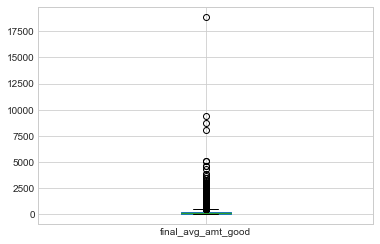

In [30]:
#We have already treated the NaNs in column required to filter the high usage customers. 
#Let us filter it out and then look for any more missing values.

#calculate the avg amount in 'good' months
telecom['final_avg_amt_good']=(telecom['total_rech_amt_6']+telecom['av_rech_amt_data_6']+telecom['av_rech_amt_data_7']+telecom['total_rech_amt_7'])/4

#checking if there are outliers, removing it from analysis
telecom.boxplot(column='final_avg_amt_good')

### Filtering high value customers from the data 

In [31]:
telecom=telecom[telecom['final_avg_amt_good'] < 7500]
telecom=telecom[telecom['final_avg_amt_good'] >= np.percentile(telecom['final_avg_amt_good'], 70)]
print("No.of records after filtering out the high usage customers: {}".format(telecom.shape[0]))

No.of records after filtering out the high usage customers: 30011


In [32]:
#Lets print all the columns pertaining to high churned data customers

na_counts = pd.isnull(telecom).sum()
high_na_cols = na_counts[na_counts >= np.int32((telecom.shape[0]/20))] #> 5% and < 10%
print(high_na_cols)
#All the columns are pertaining to 9th Month, this data will get dropped after we tag records on churn status. 
#No need to deal with it.

onnet_mou_9         1824
offnet_mou_9        1824
roam_ic_mou_9       1824
roam_og_mou_9       1824
loc_og_t2t_mou_9    1824
loc_og_t2m_mou_9    1824
loc_og_t2f_mou_9    1824
loc_og_t2c_mou_9    1824
loc_og_mou_9        1824
std_og_t2t_mou_9    1824
std_og_t2m_mou_9    1824
std_og_t2f_mou_9    1824
std_og_mou_9        1824
isd_og_mou_9        1824
spl_og_mou_9        1824
og_others_9         1824
loc_ic_t2t_mou_9    1824
loc_ic_t2m_mou_9    1824
loc_ic_t2f_mou_9    1824
loc_ic_mou_9        1824
std_ic_t2t_mou_9    1824
std_ic_t2m_mou_9    1824
std_ic_t2f_mou_9    1824
std_ic_mou_9        1824
spl_ic_mou_9        1824
isd_ic_mou_9        1824
ic_others_9         1824
dtype: int64


Tag the churn customer in telecom_test based on - total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9 and remove from the dataset which wouldn't be required for training the dataset

In [33]:
#1) Tag the churn customer in telecom_test based on - total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
telecom['total_usage_9']=telecom['total_ic_mou_9'] + telecom['total_og_mou_9']+ telecom['vol_2g_mb_9'] + telecom['vol_3g_mb_9']
telecom['churn_status']=telecom['total_usage_9'].apply(lambda x: 1 if(x==0.00) else 0)

In [34]:
#Lets remove these columns from our training dataset
telecom.drop(telecom.filter(like='_9').columns.tolist(), axis = 1, inplace=True)
print("The schema of telecom_train is:{}".format(telecom.shape))

The schema of telecom_train is:(30011, 149)


To align all the columns to be of same pattern , lets rename the columns required 

In [35]:
#aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g - need to rename these columns to follow the pattern as other columns
telecom['vbc_3g_6']=telecom['jun_vbc_3g']
telecom['vbc_3g_7']=telecom['jul_vbc_3g']
telecom['vbc_3g_8']=telecom['aug_vbc_3g']
telecom.drop(['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','sep_vbc_3g'], axis = 1, inplace=True)
telecom.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803          NaN          NaN   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
16     7000875565   430.975   299.869   187.894        50.51        74.01   
21     7002124215   514.453   597.753   637.760       102.41       132.11   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8    ...     \
0          0.00           NaN           NaN          0.00    ...      
7         52.29        453.43        567.16        325.91    ...      
8         35.08         94.66         80.63        136.48    ...      
16        70.61        296.29        229.74        162.76    ...      
21        85.14        757.93        896.68        983.39    ...      

    sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  aon  final_avg_amt_good  \
0             0        1.0        1.0        1.0  968              279.50   
7             0       -1.0       -1.0       -1.0  802              592.50   
8             0       -1.0        1.0        1.0  315              303.75   
16            0       -1.0       -1.0       -1.0  511              229.50   
21            0       -1.0       -1.0       -1.0  720              320.00   

    churn_status  vbc_3g_6  vbc_3g_7  vbc_3g_8  
0              1    101.20      0.00     30.40  
7              1     18.74     19.38     57.74  
8              0    122.16    910.65     21.03  
16             0     21.89      2.45      0.00  
21             0      0.00      0.00      0.00  

[5 rows x 148 columns]

#### As we can see that couple of aggregator values are already derived from the dummy variable creation for good months , lets drop which aren't required 

In [36]:
#2) Creating derivative fields for further analysis

#As we have already created the avg of total rech amt in 'good months', we can drop the respective call_amr and data_amt columns
telecom.drop(['total_rech_amt_6','total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7'], axis = 1, inplace=True)

In [37]:
#similarly gets calculate the aggregate during the 'good phase'
telecom['avg_usage_good']=(telecom['total_ic_mou_7'] + telecom['total_og_mou_7']+ telecom['vol_2g_mb_7'] + telecom['vol_3g_mb_7'] +telecom['total_ic_mou_6'] + telecom['total_og_mou_6']+ telecom['vol_2g_mb_6'] + telecom['vol_3g_mb_6'])/2
telecom['avg_usage_action']=telecom['total_ic_mou_8'] + telecom['total_og_mou_8']+ telecom['vol_2g_mb_8']+ telecom['vol_3g_mb_8']
telecom.drop(['total_ic_mou_7','total_og_mou_7','vol_2g_mb_7','vol_3g_mb_7'], axis = 1, inplace=True)
telecom.drop(['total_ic_mou_6','total_og_mou_6','vol_2g_mb_6','vol_3g_mb_6'], axis = 1, inplace=True)
telecom.drop(['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8'], axis = 1, inplace=True)

In [38]:
#calculate the avg amount in 'good' months
telecom['final_avg_amt_action']=(telecom['total_rech_amt_8']+telecom['av_rech_amt_data_8'])/2
telecom.drop(['total_rech_amt_8','av_rech_amt_data_8'], axis = 1, inplace=True)

Lets plot the grapgh to see  action months and good month's

Text(0.5,1,'good month (Recharge 6)')

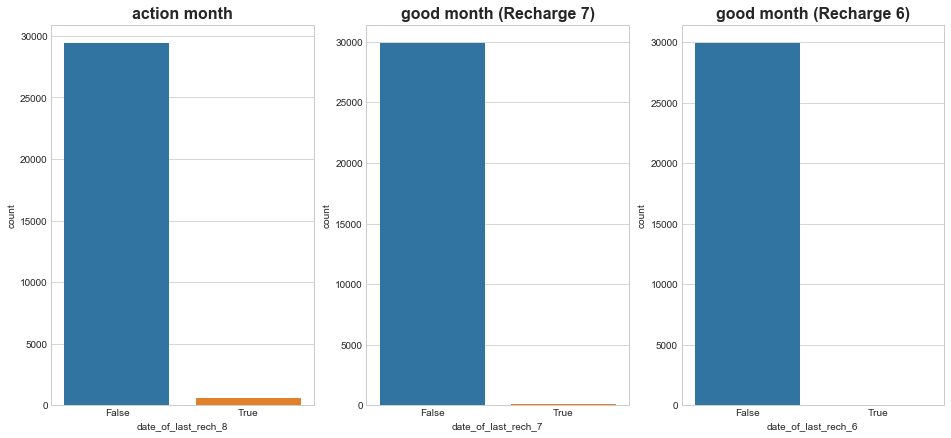

In [39]:
plt.figure(figsize=(16, 7))

plt.subplot(1, 3, 1)
sns.countplot(telecom['date_of_last_rech_8'] == '1/1/1900')
plt.title("action month", fontsize = 16, fontweight='bold')

plt.subplot(1, 3, 2)
sns.countplot(telecom['date_of_last_rech_7'] == '1/1/1900')
plt.title("good month (Recharge 7)", fontsize = 16, fontweight='bold')

plt.subplot(1, 3, 3)
sns.countplot(telecom['date_of_last_rech_6'] == '1/1/1900')
plt.title("good month (Recharge 6)", fontsize = 16, fontweight='bold')

From the plot we can see that in the action month has comparatively more nulls for last recharge date.

In [40]:
telecom.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803          NaN          NaN   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
16     7000875565   430.975   299.869   187.894        50.51        74.01   
21     7002124215   514.453   597.753   637.760       102.41       132.11   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0          0.00           NaN           NaN          0.00   
7         52.29        453.43        567.16        325.91   
8         35.08         94.66         80.63        136.48   
16        70.61        296.29        229.74        162.76   
21        85.14        757.93        896.68        983.39   

            ...           fb_user_8  aon  final_avg_amt_good  churn_status  \
0           ...                 1.0  968              279.50             1   
7           ...                -1.0  802              592.50             1   
8           ...                 1.0  315              303.75             0   
16          ...                -1.0  511              229.50             0   
21          ...                -1.0  720              320.00             0   

    vbc_3g_6  vbc_3g_7  vbc_3g_8  avg_usage_good  avg_usage_action  \
0     101.20      0.00     30.40         132.890            120.80   
7      18.74     19.38     57.74        1140.635            778.90   
8     122.16    910.65     21.03        1089.660            200.07   
16     21.89      2.45      0.00         689.620            527.84   
21      0.00      0.00      0.00        1114.055           1329.58   

    final_avg_amt_action  
0                  252.0  
7                 1819.0  
8                   94.5  
16                  80.0  
21                 359.0  

[5 rows x 133 columns]

In [41]:
telecom.describe()

mobile_number        arpu_6        arpu_7       arpu_8   onnet_mou_6  \
count   3.001100e+04  30011.000000  30011.000000  30011.00000  29515.000000   
mean    7.001216e+09    574.307127    575.945737    522.13099    281.014767   
std     6.869045e+05    402.784294    403.308986    437.36437    463.323778   
min     7.000000e+09  -2258.709000  -2014.045000   -945.80800      0.000000   
25%     7.000631e+09    345.413500    346.702000    266.10350     29.030000   
50%     7.001220e+09    490.325000    488.346000    442.85500    106.580000   
75%     7.001805e+09    701.896000    699.610000    666.04550    325.815000   
max     7.002411e+09  11505.508000  13224.119000  19295.90400   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29523.000000  28922.000000  29515.000000  29523.000000  28922.000000   
mean     289.080571    258.050869    399.772987    404.740358    365.449102   
std      485.325217    468.701637    478.438696    494.685476    482.912214   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       27.840000     21.410000    104.950000    102.735000     79.045000   
50%      104.180000     86.680000    256.990000    253.910000    221.895000   
75%      330.500000    278.475000    512.980000    519.765000    474.375000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

               ...              fb_user_8           aon  final_avg_amt_good  \
count          ...           30011.000000  30011.000000        30011.000000   
mean           ...              -0.093632   1243.816234          402.385026   
std            ...               0.966153    970.772291          236.009012   
min            ...              -1.000000    180.000000          215.500000   
25%            ...              -1.000000    469.000000          261.750000   
50%            ...              -1.000000    884.000000          329.250000   
75%            ...               1.000000   1862.500000          457.500000   
max            ...               1.000000   4321.000000         5142.500000   

       churn_status      vbc_3g_6      vbc_3g_7     vbc_3g_8  avg_usage_good  \
count  30011.000000  30011.000000  30011.000000  30011.00000    30011.000000   
mean       0.081970    153.799376    173.474484    164.28389     1411.393498   
std        0.274323    415.965458    444.112746    419.34597     1044.544511   
min        0.000000      0.000000      0.000000      0.00000        0.000000   
25%        0.000000      0.000000      0.000000      0.00000      808.017500   
50%        0.000000      0.000000      0.000000      0.00000     1155.765000   
75%        0.000000     74.940000    108.820000    104.65000     1722.715000   
max        1.000000  11166.210000   9165.600000  12916.22000    36668.790000   

       avg_usage_action  final_avg_amt_action  
count      30011.000000          30011.000000  
mean        1303.662375            356.928555  
std         1222.173069            302.218633  
min            0.000000              0.000000  
25%          575.915000            190.000000  
50%         1043.230000            300.000000  
75%         1697.285000            455.000000  
max        30046.390000          10202.500000  

[8 rows x 127 columns]

- Also lets drop any unwanted columns that will not make much sense 
- Generate defautls that will be important for defaults

In [42]:
telecom['valid_date_last_rech_6']=telecom["date_of_last_rech_6"].apply(lambda x : 0 if(x=="1/1/1900") else 1)
telecom['valid_date_last_rech_7']=telecom["date_of_last_rech_7"].apply(lambda x : 0 if(x=="1/1/1900") else 1)
telecom['valid_date_last_rech_8']=telecom["date_of_last_rech_8"].apply(lambda x : 0 if(x=="1/1/1900") else 1)
telecom['valid_date_last_rech_data_6']=telecom["date_of_last_rech_6"].apply(lambda x : 0 if(x=="1/1/1900") else 1)
telecom['valid_date_last_rech_data_7']=telecom["date_of_last_rech_7"].apply(lambda x : 0 if(x=="1/1/1900") else 1)
telecom['valid_date_last_rech_data_8']=telecom["date_of_last_rech_8"].apply(lambda x : 0 if(x=="1/1/1900") else 1)

In [43]:
telecom.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], axis = 1, inplace=True)

Clean up any space in the columns to avoid any type conversion failures

In [44]:
for column in telecom.columns:
    telecom[column] = telecom[column].replace(r'\s+', 0, regex=True)
    
telecom.fillna(0, inplace=True)
telecom.to_csv("telecom_train.csv")

# Standardization of Features

In [45]:
telcom=(telecom-telecom.mean())/telecom.std()
telcom.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0       -0.542742 -0.935792 -0.895417 -0.704968    -0.599666    -0.589084   
7       -0.748232  1.228630  1.918887  6.057533    -0.474165    -0.475816   
8        0.450253 -0.485585 -0.207590 -0.879745     0.297955     0.138063   
16      -0.494974 -0.355853 -0.684529 -0.764207    -0.490070    -0.435774   
21       1.322818 -0.148601  0.054071  0.264377    -0.377458    -0.315422   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0     -0.537536     -0.823905     -0.807117     -0.735303   
7     -0.424511      0.126288      0.342586     -0.054864   
8     -0.461711     -0.625538     -0.643670     -0.450358   
16    -0.384913     -0.203010     -0.341406     -0.395491   
21    -0.353506      0.764387      1.010563      1.317832   

               ...               vbc_3g_8  avg_usage_good  avg_usage_action  \
0              ...              -0.319268       -1.223982         -0.967835   
7              ...              -0.254072       -0.259212         -0.429368   
8              ...              -0.341613       -0.308013         -0.902976   
16             ...              -0.391762       -0.690994         -0.634789   
21             ...              -0.391762       -0.284659          0.021206   

    final_avg_amt_action  valid_date_last_rech_6  valid_date_last_rech_7  \
0              -0.347194                0.045129                0.056943   
7               4.837794                0.045129                0.056943   
8              -0.868340                0.045129                0.056943   
16             -0.916319                0.045129                0.056943   
21              0.006854                0.045129                0.056943   

    valid_date_last_rech_8  valid_date_last_rech_data_6  \
0                 0.140256                     0.045129   
7                 0.140256                     0.045129   
8                 0.140256                     0.045129   
16                0.140256                     0.045129   
21                0.140256                     0.045129   

    valid_date_last_rech_data_7  valid_date_last_rech_data_8  
0                      0.056943                     0.140256  
7                      0.056943                     0.140256  
8                      0.056943                     0.140256  
16                     0.056943                     0.140256  
21                     0.056943                     0.140256  

[5 rows x 133 columns]

## Check churn rate for the data

In [48]:
churn = (sum(telecom['churn_status'])/len(telecom['churn_status'].index))*100
churn

8.196994435373696

There is around 8.2 % of churn rate in the data

### Lets move on to generate the model

## Model Building

Let's start by splitting our data into a training set and a test set.

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Putting feature variable to X
X = telecom.drop(['churn_status','mobile_number'],axis=1)

# Putting response variable to y
y = telecom['churn_status']


In [54]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

## Running Your First Training Model

In [55]:
# Logistic regression model
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           churn_status   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20881
Model Family:                Binomial   Df Model:                          125
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3645.0
Date:                Sun, 26 Aug 2018   Deviance:                       7290.0
Time:                        14:14:05   Pearson chi2:                 2.93e+08
No. Iterations:                    12   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           2.3817      0.583      4.083      0.000       1.238       3.525
arpu_6                          0.0006      0.000      2.571      0.010       0.000       0.001
arpu_7                          0.0004      0.000      1.914      0.056   -1.09e-05       0.001
arpu_8                          0.0003      0.000      0.898      0.369      -0.000       0.001
onnet_mou_6                    -0.0073      0.006     -1.184      0.237      -0.019       0.005
onnet_mou_7                     0.0063      0.004      1.481      0.139      -0.002       0.015
onnet_mou_8                     0.0018      0.007      0.247      0.805      -0.013       0.016
offnet_mou_6                   -0.0071      0.006     -1.163      0.245      -0.019       0.005
offnet_mou_7                    0.0067      0.004      1.603      0.109      -0.001       0.015
offnet_mou_8                    0.0005      0.007      0.065      0.948      -0.014       0.015
roam_ic_mou_6                   0.0007      0.000      1.759      0.079   -8.48e-05       0.002
roam_ic_mou_7                   0.0013      0.001      2.516      0.012       0.000       0.002
roam_ic_mou_8                  -0.0013      0.001     -2.416      0.016      -0.002      -0.000
roam_og_mou_6                   0.0074      0.006      1.207      0.228      -0.005       0.019
roam_og_mou_7                  -0.0062      0.004     -1.466      0.143      -0.014       0.002
roam_og_mou_8                  -0.0002      0.007     -0.032      0.974      -0.015       0.014
loc_og_t2t_mou_6               -1.5746      5.815     -0.271      0.787     -12.971       9.822
loc_og_t2t_mou_7                7.2812      5.774      1.261      0.207      -4.037      18.599
loc_og_t2t_mou_8               36.0633      6.715      5.371      0.000      22.903      49.224
loc_og_t2m_mou_6               -1.5756      5.815     -0.271      0.786     -12.972       9.821
loc_og_t2m_mou_7                7.2807      5.775      1.261      0.207      -4.037      18.599
loc_og_t2m_mou_8               36.0653      6.715      5.371      0.000      22.905      49.226
loc_og_t2f_mou_6               -1.5763      5.815     -0.271      0.786     -12.974       9.821
loc_og_t2f_mou_7                7.2728      5.775      1.259      0.208      -4.046      18.591
loc_og_t2f_mou_8               36.0732      6.715      5.372      0.000      22.912      49.235
loc_og_t2c_mou_6               -0.0100      0.006     -1.605      0.108      -0.022       0.002
loc_og_t2c_mou_7                0.0017      0.005      0.372      0.710      -0.007       0.011
loc_og_t2c_mou_8                0.0106      0.008      1.395      0.163      -0.004       0.026
loc_og_mou_6                    1.5824      5.815      0.272      0.786      -9.814      12.979
loc_og_mou_7                   -7.2874      5.775     -1.262      0.207     -18.605       

# Correlation Matrix

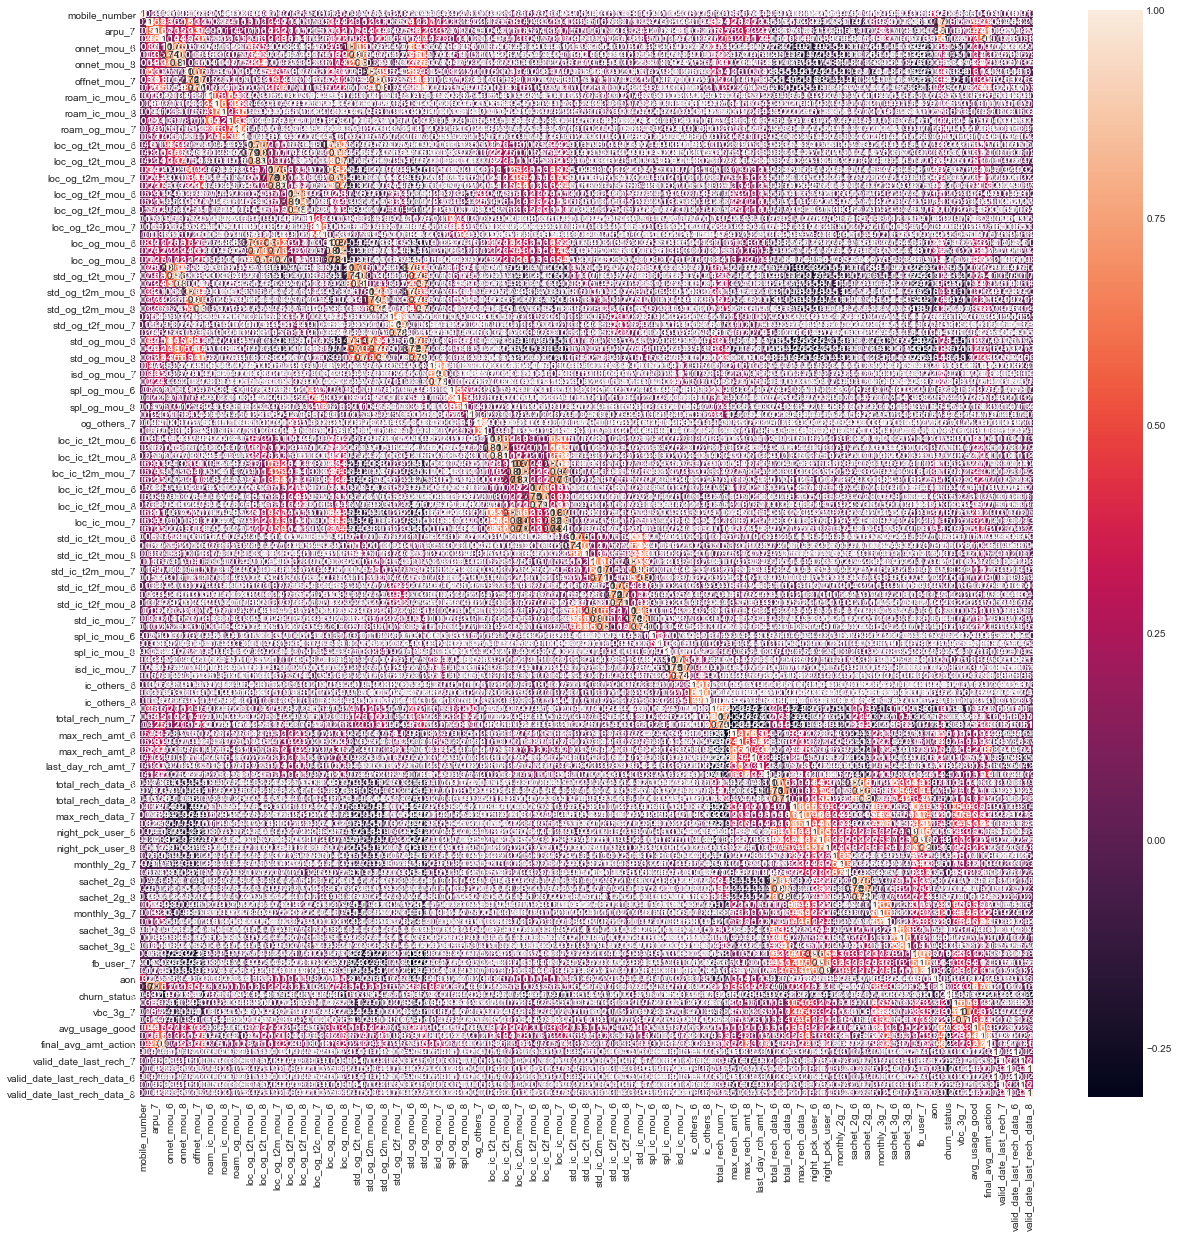

In [56]:
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)

### Feature Selection Using RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output (tried with 50 and 30, now checking with 20)
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

In [103]:
#When rfe was run with 50 variables
col = X_train.columns[rfe.support_]
print(col)
X_train_rfe = X_train[col]

Index(['std_ic_t2f_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8', 'total_rech_num_8',
       'total_rech_data_8', 'night_pck_user_6', 'night_pck_user_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8',
       'sachet_3g_7', 'fb_user_6', 'fb_user_8', 'valid_date_last_rech_6',
       'valid_date_last_rech_7', 'valid_date_last_rech_8',
       'valid_date_last_rech_data_6', 'valid_date_last_rech_data_7',
       'valid_date_last_rech_data_8'],
      dtype='object')


In [104]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
#Comparing the model with StatsModels
import statsmodels.api as sm
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           churn_status   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20989
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4874.2
Date:                Sun, 26 Aug 2018   Deviance:                       9748.4
Time:                        13:04:41   Pearson chi2:                 1.66e+10
No. Iterations:                     9   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.3935      0.495      2.816      0.005       0.424       2.363
std_ic_t2f_mou_8               -0.1292      0.016     -8.333      0.000      -0.160      -0.099
spl_ic_mou_7                   -0.1228      0.309     -0.398      0.691      -0.728       0.482
spl_ic_mou_8                   -2.8697      0.510     -5.621      0.000      -3.870      -1.869
total_rech_num_8               -0.1017      0.006    -17.042      0.000      -0.113      -0.090
total_rech_data_8              -0.3174      0.083     -3.806      0.000      -0.481      -0.154
night_pck_user_6               -0.2869      0.212     -1.351      0.177      -0.703       0.129
night_pck_user_8                0.7204      0.243      2.960      0.003       0.243       1.197
monthly_2g_6                   -0.2527      0.102     -2.480      0.013      -0.452      -0.053
monthly_2g_7                   -0.5090      0.110     -4.626      0.000      -0.725      -0.293
monthly_2g_8                   -0.6964      0.212     -3.287      0.001      -1.112      -0.281
sachet_2g_8                     0.2880      0.080      3.592      0.000       0.131       0.445
sachet_3g_7                     0.2245      0.035      6.396      0.000       0.156       0.293
fb_user_6                       0.3315      0.117      2.825      0.005       0.102       0.562
fb_user_8                      -1.0607      0.148     -7.167      0.000      -1.351      -0.771
valid_date_last_rech_6         -0.3699      0.195     -1.896      0.058      -0.752       0.013
valid_date_last_rech_7         -0.4408      0.137     -3.225      0.001      -0.709      -0.173
valid_date_last_rech_8         -0.5992      0.058    -10.322      0.000      -0.713      -0.485
valid_date_last_rech_data_6    -0.3699      0.195     -1.896      0.058      -0.752       0.013
valid_date_last_rech_data_7    -0.4408      0.137     -3.225      0.001      -0.709      -0.173
valid_date_last_rech_data_8    -0.5992      0.058    -10.322      0.000      -0.713      -0.485
===============================================================================================
"""

Lets look at the columns and start dropping columns with high P values

In [106]:
#spl_ic_mou_7 = 0.5
#Removing variables with high p value
X_train_rfe.drop(['spl_ic_mou_7'],axis=1,inplace=True)

In [107]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           churn_status   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20990
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4874.3
Date:                Sun, 26 Aug 2018   Deviance:                       9748.5
Time:                        13:04:46   Pearson chi2:                 1.67e+10
No. Iterations:                    10   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.3955      0.495      2.821      0.005       0.426       2.365
std_ic_t2f_mou_8               -0.1291      0.015     -8.331      0.000      -0.159      -0.099
spl_ic_mou_8                   -2.8797      0.510     -5.644      0.000      -3.880      -1.880
total_rech_num_8               -0.1017      0.006    -17.048      0.000      -0.113      -0.090
total_rech_data_8              -0.3175      0.083     -3.807      0.000      -0.481      -0.154
night_pck_user_6               -0.2894      0.212     -1.363      0.173      -0.705       0.127
night_pck_user_8                0.7232      0.243      2.973      0.003       0.247       1.200
monthly_2g_6                   -0.2536      0.102     -2.489      0.013      -0.453      -0.054
monthly_2g_7                   -0.5092      0.110     -4.628      0.000      -0.725      -0.294
monthly_2g_8                   -0.6964      0.212     -3.288      0.001      -1.112      -0.281
sachet_2g_8                     0.2881      0.080      3.594      0.000       0.131       0.445
sachet_3g_7                     0.2246      0.035      6.397      0.000       0.156       0.293
fb_user_6                       0.3326      0.117      2.836      0.005       0.103       0.563
fb_user_8                      -1.0619      0.148     -7.178      0.000      -1.352      -0.772
valid_date_last_rech_6         -0.3707      0.195     -1.900      0.057      -0.753       0.012
valid_date_last_rech_7         -0.4418      0.137     -3.233      0.001      -0.710      -0.174
valid_date_last_rech_8         -0.5990      0.058    -10.319      0.000      -0.713      -0.485
valid_date_last_rech_data_6    -0.3707      0.195     -1.900      0.057      -0.753       0.012
valid_date_last_rech_data_7    -0.4418      0.137     -3.233      0.001      -0.710      -0.174
valid_date_last_rech_data_8    -0.5990      0.058    -10.319      0.000      -0.713      -0.485
===============================================================================================
"""

In [ ]:
#checking VIF for the next set of columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X_train_rfe.values, i) 
               for i in range(X_train_rfe.shape[1])], 
              index=X_train_rfe.columns)

In [111]:
#P value is 0.13 and vif is infinite for 
# X_train_rfe.drop(['monthly_3g_8'],axis=1,inplace=True)

In [112]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           churn_status   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20990
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4874.3
Date:                Sun, 26 Aug 2018   Deviance:                       9748.5
Time:                        13:05:14   Pearson chi2:                 1.67e+10
No. Iterations:                    10   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.3955      0.495      2.821      0.005       0.426       2.365
std_ic_t2f_mou_8               -0.1291      0.015     -8.331      0.000      -0.159      -0.099
spl_ic_mou_8                   -2.8797      0.510     -5.644      0.000      -3.880      -1.880
total_rech_num_8               -0.1017      0.006    -17.048      0.000      -0.113      -0.090
total_rech_data_8              -0.3175      0.083     -3.807      0.000      -0.481      -0.154
night_pck_user_6               -0.2894      0.212     -1.363      0.173      -0.705       0.127
night_pck_user_8                0.7232      0.243      2.973      0.003       0.247       1.200
monthly_2g_6                   -0.2536      0.102     -2.489      0.013      -0.453      -0.054
monthly_2g_7                   -0.5092      0.110     -4.628      0.000      -0.725      -0.294
monthly_2g_8                   -0.6964      0.212     -3.288      0.001      -1.112      -0.281
sachet_2g_8                     0.2881      0.080      3.594      0.000       0.131       0.445
sachet_3g_7                     0.2246      0.035      6.397      0.000       0.156       0.293
fb_user_6                       0.3326      0.117      2.836      0.005       0.103       0.563
fb_user_8                      -1.0619      0.148     -7.178      0.000      -1.352      -0.772
valid_date_last_rech_6         -0.3707      0.195     -1.900      0.057      -0.753       0.012
valid_date_last_rech_7         -0.4418      0.137     -3.233      0.001      -0.710      -0.174
valid_date_last_rech_8         -0.5990      0.058    -10.319      0.000      -0.713      -0.485
valid_date_last_rech_data_6    -0.3707      0.195     -1.900      0.057      -0.753       0.012
valid_date_last_rech_data_7    -0.4418      0.137     -3.233      0.001      -0.710      -0.174
valid_date_last_rech_data_8    -0.5990      0.058    -10.319      0.000      -0.713      -0.485
===============================================================================================
"""

In [113]:
pd.Series([variance_inflation_factor(X_train_rfe.values, i) 
               for i in range(X_train_rfe.shape[1])], 
              index=X_train_rfe.columns)

std_ic_t2f_mou_8                1.017483
spl_ic_mou_8                    1.062799
total_rech_num_8                2.611682
total_rech_data_8              10.371025
night_pck_user_6               29.896651
night_pck_user_8               27.961814
monthly_2g_6                    2.082459
monthly_2g_7                    2.022776
monthly_2g_8                    2.121267
sachet_2g_8                     7.016322
sachet_3g_7                     1.662327
fb_user_6                      17.633600
fb_user_8                      16.291834
valid_date_last_rech_6               inf
valid_date_last_rech_7               inf
valid_date_last_rech_8               inf
valid_date_last_rech_data_6          inf
valid_date_last_rech_data_7          inf
valid_date_last_rech_data_8          inf
dtype: float64

In [114]:
#removing night_pck_user_6 due to high vif anf high p value
X_train_rfe.drop(['night_pck_user_6'],axis=1,inplace=True)

In [115]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           churn_status   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4875.2
Date:                Sun, 26 Aug 2018   Deviance:                       9750.5
Time:                        13:05:19   Pearson chi2:                 1.57e+10
No. Iterations:                     9   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.4891      0.490      3.040      0.002       0.529       2.449
std_ic_t2f_mou_8               -0.1287      0.015     -8.313      0.000      -0.159      -0.098
spl_ic_mou_8                   -2.8834      0.511     -5.647      0.000      -3.884      -1.883
total_rech_num_8               -0.1019      0.006    -17.068      0.000      -0.114      -0.090
total_rech_data_8              -0.3127      0.083     -3.752      0.000      -0.476      -0.149
night_pck_user_8                0.6251      0.234      2.675      0.007       0.167       1.083
monthly_2g_6                   -0.2486      0.102     -2.443      0.015      -0.448      -0.049
monthly_2g_7                   -0.5034      0.110     -4.581      0.000      -0.719      -0.288
monthly_2g_8                   -0.7033      0.212     -3.321      0.001      -1.118      -0.288
sachet_2g_8                     0.2826      0.080      3.531      0.000       0.126       0.439
sachet_3g_7                     0.2193      0.035      6.228      0.000       0.150       0.288
fb_user_6                       0.1798      0.036      5.045      0.000       0.110       0.250
fb_user_8                      -1.0078      0.143     -7.046      0.000      -1.288      -0.727
valid_date_last_rech_6         -0.3715      0.195     -1.904      0.057      -0.754       0.011
valid_date_last_rech_7         -0.4422      0.137     -3.234      0.001      -0.710      -0.174
valid_date_last_rech_8         -0.5991      0.058    -10.324      0.000      -0.713      -0.485
valid_date_last_rech_data_6    -0.3715      0.195     -1.904      0.057      -0.754       0.011
valid_date_last_rech_data_7    -0.4422      0.137     -3.234      0.001      -0.710      -0.174
valid_date_last_rech_data_8    -0.5991      0.058    -10.324      0.000      -0.713      -0.485
===============================================================================================
"""

In [116]:
pd.Series([variance_inflation_factor(X_train_rfe.values, i) 
               for i in range(X_train_rfe.shape[1])], 
              index=X_train_rfe.columns)

std_ic_t2f_mou_8                1.017479
spl_ic_mou_8                    1.062783
total_rech_num_8                2.610546
total_rech_data_8              10.361735
night_pck_user_8               24.086908
monthly_2g_6                    2.079885
monthly_2g_7                    2.021894
monthly_2g_8                    2.120147
sachet_2g_8                     7.007106
sachet_3g_7                     1.651747
fb_user_6                       1.971931
fb_user_8                      14.168401
valid_date_last_rech_6               inf
valid_date_last_rech_7               inf
valid_date_last_rech_8               inf
valid_date_last_rech_data_6          inf
valid_date_last_rech_data_7          inf
valid_date_last_rech_data_8          inf
dtype: float64

In [117]:
#night_pck_user_8 removing ir due to high p value and vif
X_train_rfe.drop(['night_pck_user_8'],axis=1,inplace=True)

In [118]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           churn_status   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20992
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4878.5
Date:                Sun, 26 Aug 2018   Deviance:                       9757.1
Time:                        13:05:30   Pearson chi2:                 1.62e+10
No. Iterations:                    12   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.1874      0.476      2.492      0.013       0.254       2.121
std_ic_t2f_mou_8               -0.1290      0.015     -8.333      0.000      -0.159      -0.099
spl_ic_mou_8                   -2.8624      0.511     -5.602      0.000      -3.864      -1.861
total_rech_num_8               -0.1013      0.006    -17.037      0.000      -0.113      -0.090
total_rech_data_8              -0.3326      0.084     -3.972      0.000      -0.497      -0.168
monthly_2g_6                   -0.2488      0.102     -2.448      0.014      -0.448      -0.050
monthly_2g_7                   -0.5076      0.110     -4.624      0.000      -0.723      -0.292
monthly_2g_8                   -0.7192      0.212     -3.398      0.001      -1.134      -0.304
sachet_2g_8                     0.3219      0.079      4.060      0.000       0.166       0.477
sachet_3g_7                     0.2286      0.035      6.616      0.000       0.161       0.296
fb_user_6                       0.1723      0.036      4.842      0.000       0.103       0.242
fb_user_8                      -0.6699      0.065    -10.248      0.000      -0.798      -0.542
valid_date_last_rech_6         -0.3666      0.195     -1.880      0.060      -0.749       0.016
valid_date_last_rech_7         -0.4403      0.137     -3.222      0.001      -0.708      -0.172
valid_date_last_rech_8         -0.5989      0.058    -10.323      0.000      -0.713      -0.485
valid_date_last_rech_data_6    -0.3666      0.195     -1.880      0.060      -0.749       0.016
valid_date_last_rech_data_7    -0.4403      0.137     -3.222      0.001      -0.708      -0.172
valid_date_last_rech_data_8    -0.5989      0.058    -10.323      0.000      -0.713      -0.485
===============================================================================================
"""

In [119]:
#Checking VIF 
pd.Series([variance_inflation_factor(X_train_rfe.values, i) 
               for i in range(X_train_rfe.shape[1])], 
              index=X_train_rfe.columns)

std_ic_t2f_mou_8                1.017396
spl_ic_mou_8                    1.061979
total_rech_num_8                2.605132
total_rech_data_8              10.361438
monthly_2g_6                    2.079803
monthly_2g_7                    2.021121
monthly_2g_8                    2.115441
sachet_2g_8                     6.984171
sachet_3g_7                     1.642313
fb_user_6                       1.949757
fb_user_8                       2.361625
valid_date_last_rech_6               inf
valid_date_last_rech_7               inf
valid_date_last_rech_8               inf
valid_date_last_rech_data_6          inf
valid_date_last_rech_data_7          inf
valid_date_last_rech_data_8          inf
dtype: float64

In [120]:
#valid_date_last_rech_data_6 - removing it due to high p value and vif
X_train_rfe.drop(['valid_date_last_rech_data_6'],axis=1,inplace=True)

In [121]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           churn_status   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20992
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4878.5
Date:                Sun, 26 Aug 2018   Deviance:                       9757.1
Time:                        13:05:55   Pearson chi2:                 1.62e+10
No. Iterations:                     9   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.1874      0.476      2.492      0.013       0.254       2.121
std_ic_t2f_mou_8               -0.1290      0.015     -8.333      0.000      -0.159      -0.099
spl_ic_mou_8                   -2.8624      0.511     -5.602      0.000      -3.864      -1.861
total_rech_num_8               -0.1013      0.006    -17.037      0.000      -0.113      -0.090
total_rech_data_8              -0.3326      0.084     -3.972      0.000      -0.497      -0.168
monthly_2g_6                   -0.2488      0.102     -2.448      0.014      -0.448      -0.050
monthly_2g_7                   -0.5076      0.110     -4.624      0.000      -0.723      -0.292
monthly_2g_8                   -0.7192      0.212     -3.398      0.001      -1.134      -0.304
sachet_2g_8                     0.3219      0.079      4.060      0.000       0.166       0.477
sachet_3g_7                     0.2286      0.035      6.616      0.000       0.161       0.296
fb_user_6                       0.1723      0.036      4.842      0.000       0.103       0.242
fb_user_8                      -0.6699      0.065    -10.248      0.000      -0.798      -0.542
valid_date_last_rech_6         -0.7333      0.390     -1.880      0.060      -1.498       0.031
valid_date_last_rech_7         -0.4403      0.137     -3.222      0.001      -0.708      -0.172
valid_date_last_rech_8         -0.5989      0.058    -10.323      0.000      -0.713      -0.485
valid_date_last_rech_data_7    -0.4403      0.137     -3.222      0.001      -0.708      -0.172
valid_date_last_rech_data_8    -0.5989      0.058    -10.323      0.000      -0.713      -0.485
===============================================================================================
"""

In [122]:
pd.Series([variance_inflation_factor(X_train_rfe.values, i) 
               for i in range(X_train_rfe.shape[1])], 
              index=X_train_rfe.columns)

std_ic_t2f_mou_8                 1.017396
spl_ic_mou_8                     1.061979
total_rech_num_8                 2.605132
total_rech_data_8               10.361438
monthly_2g_6                     2.079803
monthly_2g_7                     2.021121
monthly_2g_8                     2.115441
sachet_2g_8                      6.984171
sachet_3g_7                      1.642313
fb_user_6                        1.949757
fb_user_8                        2.361625
valid_date_last_rech_6         182.261299
valid_date_last_rech_7                inf
valid_date_last_rech_8                inf
valid_date_last_rech_data_7           inf
valid_date_last_rech_data_8           inf
dtype: float64

In [123]:
#removing all valid_date fields
#valid_date_last_rech_data_6 - removing it due to high p value and vif
X_train_rfe.drop(['valid_date_last_rech_data_7','valid_date_last_rech_data_8','valid_date_last_rech_7','valid_date_last_rech_8'],axis=1,inplace=True)

In [124]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           churn_status   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20994
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4947.0
Date:                Sun, 26 Aug 2018   Deviance:                       9894.0
Time:                        13:06:01   Pearson chi2:                 3.61e+10
No. Iterations:                     9   Covariance Type:             nonrobust
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.5681      0.374     -1.520      0.128      -1.300       0.164
std_ic_t2f_mou_8          -0.1347      0.016     -8.553      0.000      -0.166      -0.104
spl_ic_mou_8              -2.9637      0.515     -5.757      0.000      -3.973      -1.955
total_rech_num_8          -0.1225      0.006    -20.216      0.000      -0.134      -0.111
total_rech_data_8         -0.3298      0.086     -3.855      0.000      -0.497      -0.162
monthly_2g_6              -0.2137      0.099     -2.149      0.032      -0.409      -0.019
monthly_2g_7              -0.5558      0.109     -5.094      0.000      -0.770      -0.342
monthly_2g_8              -0.7062      0.211     -3.339      0.001      -1.121      -0.292
sachet_2g_8                0.3428      0.081      4.248      0.000       0.185       0.501
sachet_3g_7                0.2358      0.036      6.630      0.000       0.166       0.306
fb_user_6                  0.1870      0.035      5.355      0.000       0.119       0.255
fb_user_8                 -0.7397      0.065    -11.311      0.000      -0.868      -0.612
valid_date_last_rech_6    -0.8954      0.371     -2.411      0.016      -1.623      -0.168
==========================================================================================
"""

In [125]:
pd.Series([variance_inflation_factor(X_train_rfe.values, i) 
               for i in range(X_train_rfe.shape[1])], 
              index=X_train_rfe.columns)

std_ic_t2f_mou_8           1.017195
spl_ic_mou_8               1.061312
total_rech_num_8           2.548689
total_rech_data_8         10.360847
monthly_2g_6               2.079783
monthly_2g_7               2.020129
monthly_2g_8               2.115425
sachet_2g_8                6.982990
sachet_3g_7                1.642058
fb_user_6                  1.940234
fb_user_8                  2.323085
valid_date_last_rech_6     2.902436
dtype: float64

In [126]:
#valid_date_last_rech_data_6 - removing it due to high p value and vif
X_train_rfe.drop(['monthly_2g_6'],axis=1,inplace=True)

In [127]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           churn_status   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20995
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4949.4
Date:                Sun, 26 Aug 2018   Deviance:                       9898.8
Time:                        13:06:03   Pearson chi2:                 3.55e+10
No. Iterations:                     9   Covariance Type:             nonrobust
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.5870      0.373     -1.573      0.116      -1.318       0.145
std_ic_t2f_mou_8          -0.1346      0.016     -8.550      0.000      -0.165      -0.104
spl_ic_mou_8              -2.9656      0.515     -5.760      0.000      -3.975      -1.956
total_rech_num_8          -0.1225      0.006    -20.208      0.000      -0.134      -0.111
total_rech_data_8         -0.3256      0.085     -3.818      0.000      -0.493      -0.158
monthly_2g_7              -0.6308      0.104     -6.052      0.000      -0.835      -0.427
monthly_2g_8              -0.7849      0.209     -3.758      0.000      -1.194      -0.376
sachet_2g_8                0.3394      0.081      4.214      0.000       0.182       0.497
sachet_3g_7                0.2370      0.036      6.663      0.000       0.167       0.307
fb_user_6                  0.1608      0.033      4.880      0.000       0.096       0.225
fb_user_8                 -0.7286      0.065    -11.198      0.000      -0.856      -0.601
valid_date_last_rech_6    -0.8908      0.371     -2.401      0.016      -1.618      -0.164
==========================================================================================
"""

In [128]:
pd.Series([variance_inflation_factor(X_train_rfe.values, i) 
               for i in range(X_train_rfe.shape[1])], 
              index=X_train_rfe.columns)

std_ic_t2f_mou_8           1.017170
spl_ic_mou_8               1.061298
total_rech_num_8           2.548648
total_rech_data_8         10.352518
monthly_2g_7               1.784140
monthly_2g_8               1.946022
sachet_2g_8                6.982324
sachet_3g_7                1.641694
fb_user_6                  1.749251
fb_user_8                  2.297577
valid_date_last_rech_6     2.838160
dtype: float64

In [129]:
#sachet_2g_8
X_train_rfe.drop(['sachet_2g_8'],axis=1,inplace=True)

In [130]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           churn_status   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20996
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4959.8
Date:                Sun, 26 Aug 2018   Deviance:                       9919.6
Time:                        13:06:09   Pearson chi2:                 3.76e+10
No. Iterations:                     9   Covariance Type:             nonrobust
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.7097      0.372     -1.910      0.056      -1.438       0.019
std_ic_t2f_mou_8          -0.1351      0.016     -8.569      0.000      -0.166      -0.104
spl_ic_mou_8              -2.9420      0.514     -5.723      0.000      -3.949      -1.934
total_rech_num_8          -0.1209      0.006    -20.041      0.000      -0.133      -0.109
total_rech_data_8         -0.0147      0.033     -0.452      0.651      -0.079       0.049
monthly_2g_7              -0.6292      0.104     -6.039      0.000      -0.833      -0.425
monthly_2g_8              -0.8854      0.205     -4.313      0.000      -1.288      -0.483
sachet_3g_7                0.1567      0.030      5.223      0.000       0.098       0.216
fb_user_6                  0.1611      0.033      4.878      0.000       0.096       0.226
fb_user_8                 -0.8510      0.057    -14.964      0.000      -0.963      -0.740
valid_date_last_rech_6    -0.8906      0.371     -2.401      0.016      -1.618      -0.164
==========================================================================================
"""

In [131]:
#sachet_3g_8
pd.Series([variance_inflation_factor(X_train_rfe.values, i) 
               for i in range(X_train_rfe.shape[1])], 
              index=X_train_rfe.columns)

std_ic_t2f_mou_8          1.017144
spl_ic_mou_8              1.060846
total_rech_num_8          2.545336
total_rech_data_8         2.259613
monthly_2g_7              1.783964
monthly_2g_8              1.884382
sachet_3g_7               1.291517
fb_user_6                 1.748828
fb_user_8                 2.253961
valid_date_last_rech_6    2.790386
dtype: float64

In [134]:
#X_train_rfe.drop(['sachet_3g_8'],axis=1,inplace=True)

In [135]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train_rfe)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           churn_status   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20996
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4959.8
Date:                Sun, 26 Aug 2018   Deviance:                       9919.6
Time:                        13:06:25   Pearson chi2:                 3.76e+10
No. Iterations:                     9   Covariance Type:             nonrobust
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.7097      0.372     -1.910      0.056      -1.438       0.019
std_ic_t2f_mou_8          -0.1351      0.016     -8.569      0.000      -0.166      -0.104
spl_ic_mou_8              -2.9420      0.514     -5.723      0.000      -3.949      -1.934
total_rech_num_8          -0.1209      0.006    -20.041      0.000      -0.133      -0.109
total_rech_data_8         -0.0147      0.033     -0.452      0.651      -0.079       0.049
monthly_2g_7              -0.6292      0.104     -6.039      0.000      -0.833      -0.425
monthly_2g_8              -0.8854      0.205     -4.313      0.000      -1.288      -0.483
sachet_3g_7                0.1567      0.030      5.223      0.000       0.098       0.216
fb_user_6                  0.1611      0.033      4.878      0.000       0.096       0.226
fb_user_8                 -0.8510      0.057    -14.964      0.000      -0.963      -0.740
valid_date_last_rech_6    -0.8906      0.371     -2.401      0.016      -1.618      -0.164
==========================================================================================
"""

In [136]:
pd.Series([variance_inflation_factor(X_train_rfe.values, i) 
               for i in range(X_train_rfe.shape[1])], 
              index=X_train_rfe.columns)

std_ic_t2f_mou_8          1.017144
spl_ic_mou_8              1.060846
total_rech_num_8          2.545336
total_rech_data_8         2.259613
monthly_2g_7              1.783964
monthly_2g_8              1.884382
sachet_3g_7               1.291517
fb_user_6                 1.748828
fb_user_8                 2.253961
valid_date_last_rech_6    2.790386
dtype: float64

# Making Predictions

In [137]:
logsk.fit(X_train_rfe, y_train)
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[X_train_rfe.columns.tolist()])

In [138]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [139]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [140]:
# Let's see the head
y_pred_1.head()

1
0  0.006125
1  0.146463
2  0.106449
3  0.051768
4  0.014271

In [141]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [142]:
#Print top 20 values to look at the churn status
y_test_df.head(n=20)

churn_status
29417             0
49997             0
90511             0
86886             0
91737             0
28146             0
69230             0
50903             0
31147             0
83086             1
98909             0
29720             0
31988             0
10785             0
45836             0
93892             0
30677             0
10875             0
33390             0
98606             0

In [143]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [144]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [145]:
y_pred_1.head()

1
0  0.006125
1  0.146463
2  0.106449
3  0.051768
4  0.014271

In [146]:
y_test_df.head(n=20)

churn_status  CustID
0              0   29417
1              0   49997
2              0   90511
3              0   86886
4              0   91737
5              0   28146
6              0   69230
7              0   50903
8              0   31147
9              1   83086
10             0   98909
11             0   29720
12             0   31988
13             0   10785
14             0   45836
15             0   93892
16             0   30677
17             0   10875
18             0   33390
19             0   98606

In [147]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [148]:
y_pred_final.head()

churn_status  CustID         1
0             0   29417  0.006125
1             0   49997  0.146463
2             0   90511  0.106449
3             0   86886  0.051768
4             0   91737  0.014271

In [149]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [150]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','churn_status','Churn_Prob'], axis=1)

In [151]:
# Let's see the head of y_pred_final
y_pred_final.head(n=20)

CustID  churn_status  Churn_Prob
0    29417             0    0.006125
1    49997             0    0.146463
2    90511             0    0.106449
3    86886             0    0.051768
4    91737             0    0.014271
5    28146             0    0.076389
6    69230             0    0.094397
7    50903             0    0.034095
8    31147             0    0.025549
9    83086             1    0.131900
10   98909             0    0.006602
11   29720             0    0.058951
12   31988             0    0.031186
13   10785             0    0.380812
14   45836             0    0.081293
15   93892             0    0.023010
16   30677             0    0.000195
17   10875             0    0.002203
18   33390             0    0.003916
19   98606             0    0.043186

In [152]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [153]:
# Let's see the head
y_pred_final.head()

CustID  churn_status  Churn_Prob  predicted
0   29417             0    0.006125          0
1   49997             0    0.146463          0
2   90511             0    0.106449          0
3   86886             0    0.051768          0
4   91737             0    0.014271          0

# Confusion matrix

In [154]:
from sklearn import metrics

In [155]:
# Confusion matrix 
cm1 = metrics.confusion_matrix( y_pred_final.churn_status, y_pred_final.predicted )
print(cm1)
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

[[8274    1]
 [ 725    4]]
Accuracy :  0.9193691692581075
Sensitivity :  0.9998791540785499
Specificity :  0.0054869684499314125


In [ ]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.Churn, y_pred_final.Churn_Prob))

We see an overall AUC score of 0.83 looks like we did a decent job.

# PCA on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [156]:
X_train.shape
# We have 131 variables after creating our dummy variables for our categories

(21007, 131)

In [158]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=50)

In [159]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
  svd_solver='randomized', tol=0.0, whiten=False)

### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [160]:
pca.components_

array([[ 1.12994914e-01,  1.44578066e-01,  1.63600551e-01, ...,
        -3.66219251e-08,  6.91342626e-07,  7.45846920e-06],
       [-1.11172380e-02, -9.66785360e-03,  3.22400665e-02, ...,
         9.00780218e-07,  9.16279216e-07,  3.61006154e-06],
       [-5.93227838e-02, -6.23826696e-02, -6.70685679e-02, ...,
        -8.87467911e-08,  4.44216811e-07, -1.56697075e-07],
       ...,
       [-0.00000000e+00,  1.03661108e-19, -4.91920245e-20, ...,
         5.75980941e-02, -6.94873881e-01,  1.17612705e-01],
       [ 0.00000000e+00,  1.71560781e-20, -8.57962743e-20, ...,
        -6.87984294e-01, -2.98471939e-02,  1.60582554e-01],
       [-0.00000000e+00, -1.80655169e-17, -4.61775788e-19, ...,
        -4.33876343e-03, -3.61977519e-03, -1.92613777e-02]])

In [161]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

Feature       PC1       PC2
0       arpu_6  0.112995 -0.011117
1       arpu_7  0.144578 -0.009668
2       arpu_8  0.163601  0.032240
3  onnet_mou_6  0.099226 -0.127079
4  onnet_mou_7  0.125979 -0.135029

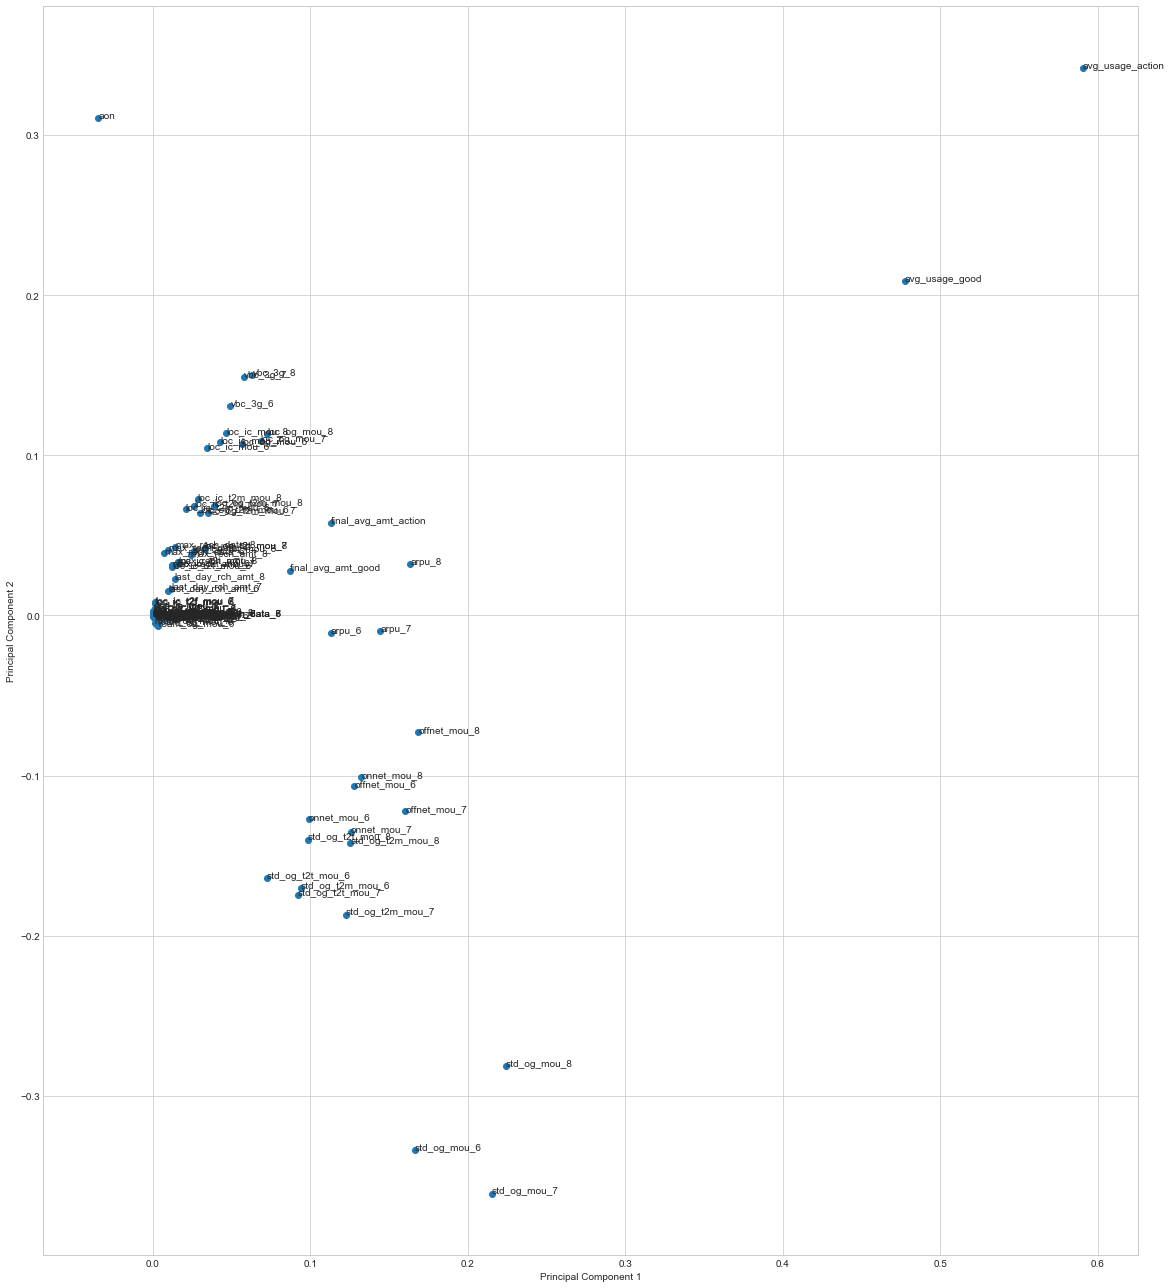

In [162]:
%matplotlib inline
fig = plt.figure(figsize = (20,16))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [163]:
pca.explained_variance_ratio_

array([3.06422553e-01, 1.67262472e-01, 9.47643031e-02, 8.56871928e-02,
       6.68791328e-02, 5.93725647e-02, 2.95312111e-02, 2.47887493e-02,
       2.27997236e-02, 1.72370778e-02, 1.42785276e-02, 1.35175177e-02,
       1.31342706e-02, 7.73254892e-03, 6.70053505e-03, 6.45208259e-03,
       6.12335787e-03, 5.80446478e-03, 5.43407896e-03, 4.94701294e-03,
       4.17682769e-03, 3.72382288e-03, 3.06634400e-03, 3.01767149e-03,
       2.71534862e-03, 2.29284920e-03, 2.00693764e-03, 1.81216660e-03,
       1.64132017e-03, 1.49124353e-03, 1.44961299e-03, 1.19029276e-03,
       1.03357818e-03, 1.00872246e-03, 9.93157828e-04, 9.09989966e-04,
       8.50281547e-04, 7.02672357e-04, 6.76717117e-04, 6.72677949e-04,
       6.56919075e-04, 6.16811161e-04, 4.80385509e-04, 4.51878605e-04,
       4.08298419e-04, 3.38974528e-04, 2.93924984e-04, 2.80691654e-04,
       2.51433176e-04, 2.45783419e-04, 2.18775137e-04, 1.88234767e-04,
       1.50914469e-04, 1.43291118e-04, 1.24741095e-04, 1.06416971e-04,
      

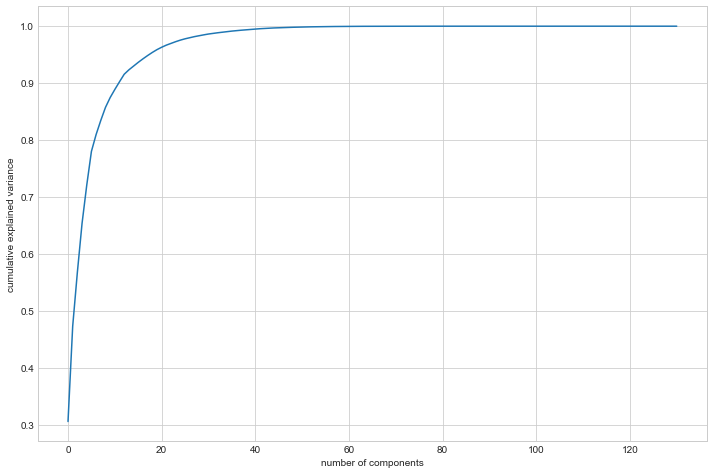

In [164]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (14,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Looks like 22 components are enough to describe 95% of the variance in the dataset
We'll choose 22 components for our modeling

In [165]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=22)

In [166]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21007, 22)

Lets draw correlation matrix and check if still there is any correlation 

In [167]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

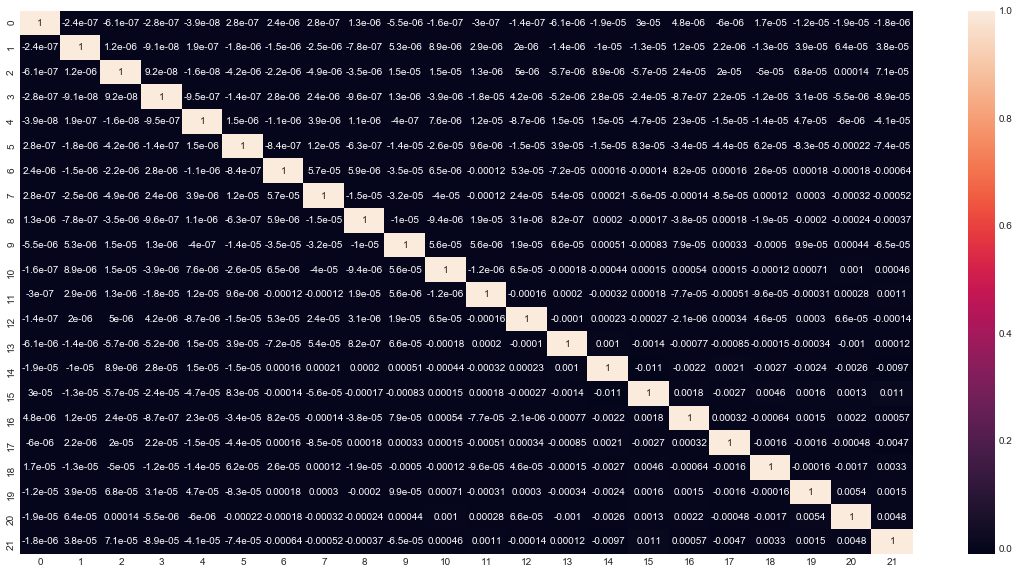

In [168]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [169]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.010509054683427096 , min corr:  -0.011029227193885598


In [ ]:
From the above correlation matrix generate , seems like no correlation between any two components. 

From this we can assume that there is no multicollinearity , and the model looks stable.

In [170]:
#Applying selected components to the test data - 22 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9004, 22)

## Applying a logistic regression on our Principal Components¶

###  Lets apply dimensionality reduction and check class imbalance  on PCA

Applying a logistic regression on our Principal Components
- We expect to get similar model performance with significantly lower features
- If we can do so, we would have done effective dimensionality reduction without losing any import information

In [171]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


# check for class imbalance
learner_pca = LogisticRegression(class_weight="balanced")
model_pca = learner_pca.fit(df_train_pca,y_train)

#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.87'

From this it can be seen that similar performance and accuracy is given by feature selection capability of PCA . Looks Great !!

In [172]:
pca_again = PCA(0.90)

In [173]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape
# we see that PCA selected 14 components

(21007, 12)

In [174]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

In [175]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape


#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.86'

### From the above it can seen that model performance the same with dimentionality reduction scenario too . 

Note : the class used for running the model in balanced

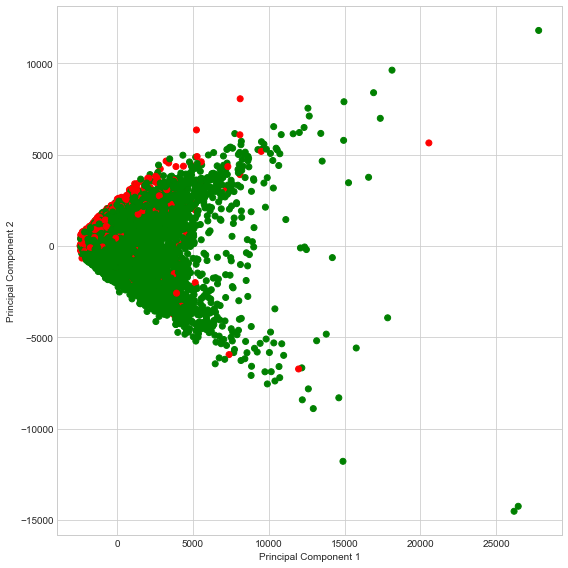

In [176]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

From the above graph , it clearly shows the good seperation between the components and also the data has a good spread

#### Let us further reduce the dimentional components and see if the performance is still the same 

In [177]:
pca_last = PCA(n_components=6)
df_train_pca3 = pca_last.fit_transform(X_train)
df_test_pca3 = pca_last.transform(X_test)
df_test_pca3.shape

(9004, 6)

In [63]:
#training the regression model
learner_pca3 = LogisticRegression()
model_pca3 = learner_pca3.fit(df_train_pca3,y_train)
#Making prediction on the test data
pred_probs_test3 = model_pca3.predict_proba(df_test_pca3)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test3))

'0.85'

In [68]:
pca_last = PCA(n_components=5)
df_train_pca3 = pca_last.fit_transform(X_train)
df_test_pca3 = pca_last.transform(X_test)
df_test_pca3.shape

(9004, 5)

In [69]:
#training the regression model
learner_pca3 = LogisticRegression()
model_pca3 = learner_pca3.fit(df_train_pca3,y_train)
#Making prediction on the test data
pred_probs_test3 = model_pca3.predict_proba(df_test_pca3)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test3))

'0.84'

Whether with 5 or 6 components , the model still performs best and accurate !! . 

# Summarizing the important features and strategy

The important features are as below. As we can see, most features are having hegative coefficient. It means that less the usage/recharge more the chances of churn.

std_ic_t2f_mou_8 -0.1351  
spl_ic_mou_8 -2.9420  
total_rech_data_8 -0.0147 
monthly_2g_7 -0.6292 
monthly_2g_8 -0.8854  
sachet_3g_7 0.1567  
fb_user_6 0.1611  
fb_user_8 -0.8510 

Operators should check if the incoming calls usage has decreased, then that is a strong indicator for customers to churn.

We can also see that the a decrease in total_recharge_amount of data pack or less usage of 2G is also a strong indicator for customers to churn.